# Assignment 7: Linear Model Selection and Regularization

Dataset(s) needed:
Kaggle House Prices (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [11]:
import pandas as pd

train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Drop the Id columns from both train and test as these are not needed for prediction

In [12]:
#TODO
train = train.drop (['Id'], axis=1)
print(train.head())

test = pd.read_csv('test.csv')
test = test.drop (['Id'], axis=1)
print(test.head())

   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig    ...     PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside    ...            0    NaN   NaN   
1         Lvl    AllPub       FR2    ...            0    NaN   NaN   
2         Lvl    AllPub    Inside    ...            0    NaN   NaN   
3         Lvl    AllPub    Corner    ...            0    NaN   NaN   
4         Lvl    AllPub       FR2    ...            0    NaN   NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0         NaN       0      2    2008        WD         Normal     208500  
1       

#### Visualize a scatter plot of 'GrLivArea' in the x-axis and 'SalePrice' in the y-axis. Can you spot any outliers?

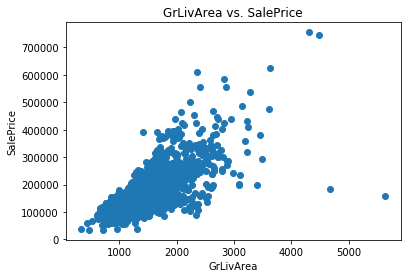

In [3]:
import matplotlib.pyplot as plt

#TODO
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('GrLivArea vs. SalePrice')
plt.show()


#### Remove outliers in the data for all GrLivArea greater than 4000 then check the scatter plot again

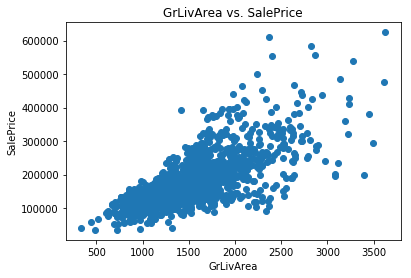

In [4]:
# Remove outliers for train['GrLivArea']>4000
#TODO
train = train.drop(train[train['GrLivArea']>4000].index)

#TODO: Scatter plot
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('GrLivArea vs. SalePrice')
plt.show()

#### Convert categorical variable into dummy variables using pandas get_dummies API


In [13]:
cols = train.columns
num_cols = train._get_numeric_data().columns

list(set(cols) - set(num_cols))



['BsmtExposure',
 'LandSlope',
 'RoofMatl',
 'PoolQC',
 'LotShape',
 'Exterior2nd',
 'MasVnrType',
 'BldgType',
 'GarageFinish',
 'HeatingQC',
 'GarageType',
 'Condition1',
 'Fence',
 'RoofStyle',
 'Utilities',
 'LotConfig',
 'MiscFeature',
 'Condition2',
 'Neighborhood',
 'MSZoning',
 'BsmtQual',
 'FireplaceQu',
 'Exterior1st',
 'BsmtFinType1',
 'Functional',
 'GarageCond',
 'SaleType',
 'Heating',
 'PavedDrive',
 'HouseStyle',
 'Foundation',
 'BsmtCond',
 'ExterQual',
 'KitchenQual',
 'Alley',
 'BsmtFinType2',
 'ExterCond',
 'Electrical',
 'SaleCondition',
 'Street',
 'LandContour',
 'CentralAir',
 'GarageQual']

In [8]:
dummies = pd.get_dummies(train[['MSZoning',
 'Alley',
 'LotConfig',
 'BsmtFinType2',
 'BsmtExposure',
 'SaleType',
 'ExterQual',
 'LandSlope',
 'HeatingQC',
 'Exterior2nd',
 'GarageCond',
 'GarageType',
 'PavedDrive',
 'Electrical',
 'BldgType',
 'GarageFinish',
 'BsmtCond',
 'Foundation',
 'Utilities',
 'FireplaceQu',
 'Functional',
 'RoofStyle',
 'ExterCond',
 'BsmtFinType1',
 'Condition1',
 'Heating',
 'Exterior1st',
 'Fence',
 'BsmtQual',
 'GarageQual',
 'LotShape',
 'MasVnrType',
 'KitchenQual',
 'Condition2',
 'SaleCondition',
 'MiscFeature',
 'HouseStyle',
 'Neighborhood',
 'PoolQC',
 'LandContour',
 'RoofMatl',
 'Street',
 'CentralAir']])
set(dummies.columns)

{'Alley_Grvl',
 'Alley_Pave',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BsmtCond_Fa',
 'BsmtCond_Gd',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'BsmtExposure_Av',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtFinType1_ALQ',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_ALQ',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'BsmtQual_Ex',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'CentralAir_N',
 'CentralAir_Y',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Artery',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_FuseA',
 'Electrical

#### Impute missing data by the mean of each column.

In [23]:
#TODO
train = train.fillna(train.mean())

Generate train test split 70/30

In [40]:
from sklearn.model_selection import train_test_split

#TODO
X_ = train.drop(['SalePrice','MSZoning',
 'Alley',
 'LotConfig',
 'BsmtFinType2',
 'BsmtExposure',
 'SaleType',
 'ExterQual',
 'LandSlope',
 'HeatingQC',
 'Exterior2nd',
 'GarageCond',
 'GarageType',
 'PavedDrive',
 'Electrical',
 'BldgType',
 'GarageFinish',
 'BsmtCond',
 'Foundation',
 'Utilities',
 'FireplaceQu',
 'Functional',
 'RoofStyle',
 'ExterCond',
 'BsmtFinType1',
 'Condition1',
 'Heating',
 'Exterior1st',
 'Fence',
 'BsmtQual',
 'GarageQual',
 'LotShape',
 'MasVnrType',
 'KitchenQual',
 'Condition2',
 'SaleCondition',
 'MiscFeature',
 'HouseStyle',
 'Neighborhood',
 'PoolQC',
 'LandContour',
 'RoofMatl',
 'Street',
 'CentralAir'], axis=1)
X = pd.concat([X_,dummies[['Alley_Grvl',
 'Alley_Pave',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BsmtCond_Fa',
 'BsmtCond_Gd',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'BsmtExposure_Av',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtFinType1_ALQ',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_ALQ',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'BsmtQual_Ex',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'CentralAir_N',
 'CentralAir_Y',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Artery',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_FuseA',
 'Electrical_FuseF',
 'Electrical_FuseP',
 'Electrical_Mix',
 'Electrical_SBrkr',
 'ExterCond_Ex',
 'ExterCond_Fa',
 'ExterCond_Gd',
 'ExterCond_Po',
 'ExterCond_TA',
 'ExterQual_Ex',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'ExterQual_TA',
 'Exterior1st_AsbShng',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stone',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'Exterior2nd_AsbShng',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_ImStucc',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Other',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Exterior2nd_Wd Shng',
 'Fence_GdPrv',
 'Fence_GdWo',
 'Fence_MnPrv',
 'Fence_MnWw',
 'FireplaceQu_Ex',
 'FireplaceQu_Fa',
 'FireplaceQu_Gd',
 'FireplaceQu_Po',
 'FireplaceQu_TA',
 'Foundation_BrkTil',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'Functional_Maj1',
 'Functional_Maj2',
 'Functional_Min1',
 'Functional_Min2',
 'Functional_Mod',
 'Functional_Sev',
 'Functional_Typ',
 'GarageCond_Ex',
 'GarageCond_Fa',
 'GarageCond_Gd',
 'GarageCond_Po',
 'GarageCond_TA',
 'GarageFinish_Fin',
 'GarageFinish_RFn',
 'GarageFinish_Unf',
 'GarageQual_Ex',
 'GarageQual_Fa',
 'GarageQual_Gd',
 'GarageQual_Po',
 'GarageQual_TA',
 'GarageType_2Types',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_BuiltIn',
 'GarageType_CarPort',
 'GarageType_Detchd',
 'HeatingQC_Ex',
 'HeatingQC_Fa',
 'HeatingQC_Gd',
 'HeatingQC_Po',
 'HeatingQC_TA',
 'Heating_Floor',
 'Heating_GasA',
 'Heating_GasW',
 'Heating_Grav',
 'Heating_OthW',
 'Heating_Wall',
 'HouseStyle_1.5Fin',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'KitchenQual_Ex',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'MasVnrType_BrkCmn',
 'MasVnrType_BrkFace',
 'MasVnrType_None',
 'MasVnrType_Stone',
 'MiscFeature_Gar2',
 'MiscFeature_Othr',
 'MiscFeature_Shed',
 'MiscFeature_TenC',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'PavedDrive_N',
 'PavedDrive_P',
 'PavedDrive_Y',
 'PoolQC_Ex',
 'PoolQC_Fa',
 'PoolQC_Gd',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'RoofStyle_Flat',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'SaleCondition_Abnorml',
 'SaleCondition_AdjLand',
 'SaleCondition_Alloca',
 'SaleCondition_Family',
 'SaleCondition_Normal',
 'SaleCondition_Partial',
 'SaleType_COD',
 'SaleType_CWD',
 'SaleType_Con',
 'SaleType_ConLD',
 'SaleType_ConLI',
 'SaleType_ConLw',
 'SaleType_New',
 'SaleType_Oth',
 'SaleType_WD',
 'Street_Grvl',
 'Street_Pave',
 'Utilities_AllPub',
 'Utilities_NoSeWa']]], axis=1 )#TODO
X = X.fillna(X.mean())
y =  train.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Linear Regression

In [41]:
from sklearn.linear_model import Ridge, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from numpy import sqrt

#Fit a linear regression model to this data
#TODO
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

#Compute the RMSE 
#TODO
y_pred = regressor.predict(X_test)  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred))) 

Mean Squared Error: 725739192840.4142
Root Mean Squared Error: 851903.2766930845


## Lasso Regression

#### Fit lasso regression to training data with alpha 20. (Bonus: You could try CV to find the best alpha within a range)

In [42]:
# try CV to find the best alpha within a range
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

alphas = [0.00001, 0.0001, 0.001, 0.1, 1, 5, 10, 20]

model = linear_model.Lasso(alpha=20, normalize=True)
    
grid_search = GridSearchCV(estimator=model, scoring='neg_mean_squared_error',
                           param_grid=dict(alpha=alphas), cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

print (grid_search.best_score_)
print (grid_search.best_estimator_.alpha)

-1365861082.1180625
20


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [43]:
from sklearn import linear_model

#TODO: fit a Lasso regression model to this data
model = linear_model.Lasso(alpha=20)
model.fit(X_train, y_train)

#Compute the RMSE 
#TODO
y_pred = model.predict(X_test)  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred))) 




Mean Squared Error: 1428586375.532825
Root Mean Squared Error: 37796.64503011908


#### How many columns has the model chosen?

In [44]:
#TODO
print(model.coef_)

[-3.96730323e+01  8.21975584e+01  6.09209915e-01  7.35271342e+03
  4.94918587e+03  2.39993829e+02  8.57450620e+01  3.28254172e+01
  1.73706092e+01  1.97202599e+01  1.15479179e+01  8.06433893e+00
  3.45244688e+01  5.07203475e+01  3.17968419e+01  6.58708987e+00
  4.07406560e+03  6.46368642e+03  5.28852695e+03  3.15345892e+03
 -2.05013467e+03 -1.25015919e+04  1.39028236e+03  6.09509425e+03
 -2.83631030e+01  5.80445083e+02  3.00488445e+01  1.98123009e+01
 -5.39188579e+00  6.79221416e+00  1.46663699e+01  2.11329298e+01
  6.53383795e+01 -4.36973970e-01 -5.94588928e+02 -3.39756912e+02
  0.00000000e+00  4.12074952e+03  1.08259482e+04  5.22591394e+02
 -0.00000000e+00 -5.10652648e+02 -0.00000000e+00 -3.63122090e+03
 -5.17328984e+03  1.64434326e+04  0.00000000e+00  0.00000000e+00
  1.59966502e+04 -3.95184738e+03 -5.16700770e+03  0.00000000e+00
  1.08728718e+03  5.48463216e+03 -3.03374619e+03 -2.04909161e+03
 -2.85139521e+03  0.00000000e+00 -4.75612692e+03  0.00000000e+00
 -9.23105067e+02 -0.00000

## Ridge Regression

#### Perform ridge regression with alpha set to 0.1 and normalize to True. (Bonus: You could try CV to find the best alpha within a range). 

In [46]:
#TODO
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

alphas = [0.00001, 0.0001, 0.001, 0.1, 1, 5, 10, 20]

model = linear_model.Ridge(alpha=0.1, normalize=True)
    
grid_search = GridSearchCV(estimator=model, scoring='neg_mean_squared_error',
                           param_grid=dict(alpha=alphas), cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

print (grid_search.best_score_)
print (grid_search.best_estimator_.alpha)



ridge_model = linear_model.Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

-3673246589922.186
20


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

#### What is your root mean squared error (RMSE)? Comment on your observation.

In [47]:
#Compute the RMSE 
#TODO
y_pred = ridge_model.predict(X_test)  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred))) 

Mean Squared Error: 1497158529.0359862
Root Mean Squared Error: 38693.132840802464


## Elastic Net Regression

#### Perform elastic net regression with different values of alpha (0.01, 0.1 and 20). Compute the RMSE as well. 


In [49]:
alphas = [0.01, 0.1, 20]

for alpha in alphas:
    #TODO: fit the Elastic net regression model to this data
    elasticnet_model = linear_model.ElasticNet(alpha=alpha)
    elasticnet_model.fit(X_train, y_train)
    #TODO: Compute the RMSE
    y_pred = elasticnet_model.predict(X_test)  
    print('using alpha:', alpha)
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred))) 

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


using alpha: 0.01
Mean Squared Error: 1375047649.9836178
Root Mean Squared Error: 37081.63494215995


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


using alpha: 0.1
Mean Squared Error: 1473412717.166593
Root Mean Squared Error: 38385.058514565186
using alpha: 20
Mean Squared Error: 2315946061.9922466
Root Mean Squared Error: 48124.2772620249


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [ ]:
#what was your incoming experience with this model, if any?
#[Payal] all of this was new learning
#what steps you took, what obstacles you encountered.
#[Payal] understanding whats happening behind these APIs took lots of  time 
#how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
#[Payal] converting categorical columns was useful since in real life we have plenty of categroical values. In real life performing these iterations to find optimum alpha would be compute intensive and might not be practical 